### **Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import tensorflow as tf

### **Importing the Data**

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Data Preprocessing**

In [5]:
sorted(data['TotalCharges'])

[' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN)

In [7]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# convert Total Charges column from object to float
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [9]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [10]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data.drop('customerID', axis=1, inplace=True)

In [12]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<ipython-input-13-9bbeb7a0f42e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


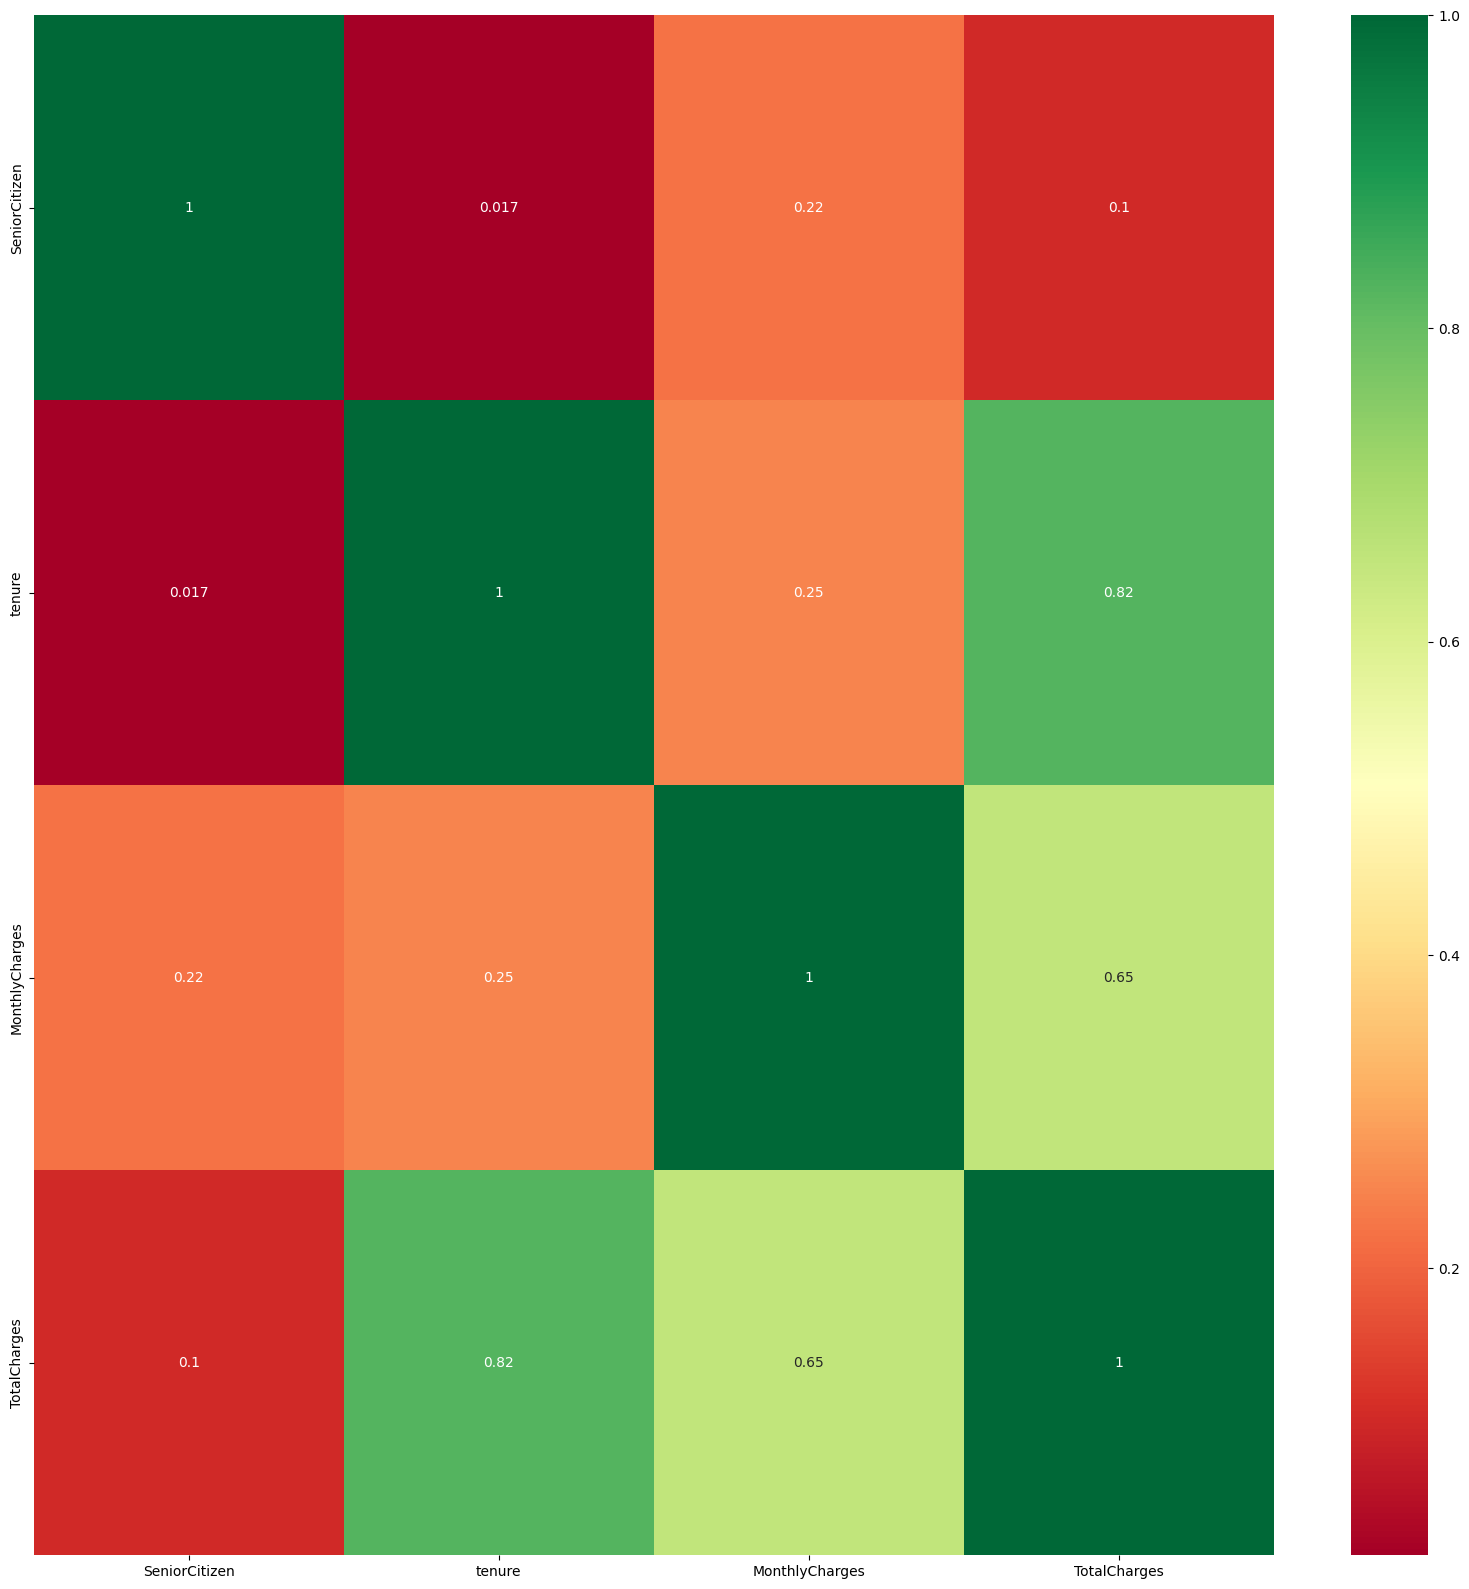

In [13]:
# Correlation
correlation = data.corr()
#top_corr_features = correlation.index
plt.figure(figsize=(20,20))
hm = sns.heatmap(correlation, annot=True, cmap="RdYlGn")

In [14]:
#Getting all the unique values for the catergorical columns
def get_unique(df, columns):
    return {column: list(df[column].unique()) for column in columns}

In [15]:
def get_categorical_columns(df):
    return [column for column in df.columns if df.dtypes[column] == 'object']

In [16]:
unique_values = get_unique(data, get_categorical_columns(data))
unique_values

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No phone service', 'No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes', 'No internet service'],
 'OnlineBackup': ['Yes', 'No', 'No internet service'],
 'DeviceProtection': ['No', 'Yes', 'No internet service'],
 'TechSupport': ['No', 'Yes', 'No internet service'],
 'StreamingTV': ['No', 'Yes', 'No internet service'],
 'StreamingMovies': ['No', 'Yes', 'No internet service'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [17]:
#further cleaning
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                                                'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [18]:
unique_values = get_unique(data, get_categorical_columns(data))
unique_values

{'gender': ['Female', 'Male'],
 'Partner': ['Yes', 'No'],
 'Dependents': ['No', 'Yes'],
 'PhoneService': ['No', 'Yes'],
 'MultipleLines': ['No', 'Yes'],
 'InternetService': ['DSL', 'Fiber optic', 'No'],
 'OnlineSecurity': ['No', 'Yes'],
 'OnlineBackup': ['Yes', 'No'],
 'DeviceProtection': ['No', 'Yes'],
 'TechSupport': ['No', 'Yes'],
 'StreamingTV': ['No', 'Yes'],
 'StreamingMovies': ['No', 'Yes'],
 'Contract': ['Month-to-month', 'One year', 'Two year'],
 'PaperlessBilling': ['Yes', 'No'],
 'PaymentMethod': ['Electronic check',
  'Mailed check',
  'Bank transfer (automatic)',
  'Credit card (automatic)'],
 'Churn': ['No', 'Yes']}

In [19]:
#Defining the type of catergorical features
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                   'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
ordinal_features = ['InternetService', 'Contract']
nomial_features = ['PaymentMethod']
target = 'Churn'

In [20]:
#The ordering for the ordinal_features
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

In [21]:
#convert the catergorical data to numeric data
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x==positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def nominal_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column])
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [22]:
data = binary_encode(data, 'gender', 'Male')

yes_features = ['Partner', 'Dependents', 'PhoneService',
                'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']
for features in binary_features:
    data = binary_encode(data, features, 'Yes')

data = ordinal_encode(data, 'InternetService', internet_ordering)
data = ordinal_encode(data, 'Contract', contract_ordering)


data = nominal_encode(data, 'PaymentMethod')

data = binary_encode(data, 'Churn', 'Yes')

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,1,0,0,1,0,1,...,0,0,1,29.85,29.85,0,0,0,1,0
1,0,0,0,0,34,1,0,1,1,0,...,0,1,0,56.95,1889.50,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,1,...,0,0,1,53.85,108.15,1,0,0,0,1
3,0,0,0,0,45,0,0,1,1,0,...,0,1,0,42.30,1840.75,0,1,0,0,0
4,0,0,0,0,2,1,0,2,0,0,...,0,0,1,70.70,151.65,1,0,0,1,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   int64  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   int64  
 3   Dependents                 7043 non-null   int64  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   MultipleLines              7043 non-null   int64  
 7   InternetService            7043 non-null   int64  
 8   OnlineSecurity             7043 non-null   int64  
 9   OnlineBackup               7043 non-null   int64  
 10  DeviceProtection           7043 non-null   int64  
 11  TechSupport                7043 non-null   int64  
 12  StreamingTV                7043 non-null   int64  
 13  StreamingMovies            7043 non-null   int64

In [25]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
data['Churn'].sum()/len(data['Churn'])

0.2653698707936959

### **XGBoost Model Building and Evaluation**

In [27]:
X_boost = data.drop('Churn', axis=1)
y_boost = data['Churn']

In [28]:
clf_random = XGBClassifier()

In [29]:
params = {
 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'max_depth':[3, 4, 5, 6, 7, 8, 10, 12, 15],
 'gamma':[0, 0.1, 0.2, 0.3, 0.4, 0.9],
 'colsample_bytree':[0.3, 0.4, 0.5, 0.7],
 'reg_alpha':[0, 0.001, 0.01, 0.05],
 'min_child_weight':[1, 3, 5, 7]
}


In [30]:
random_search = RandomizedSearchCV(clf_random, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=3)

In [31]:
random_search.fit(X_boost, y_boost)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.9],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'reg_alpha': [0, 0.001, 0.01, 0.05]},
                   scoring='roc_auc', verbose=3)

In [32]:
random_search.best_estimator_


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
random_search.best_params_


{'reg_alpha': 0,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.3,
 'gamma': 0.9,
 'colsample_bytree': 0.3}

In [34]:
clf = XGBClassifier(learning_rate =0.3,
 max_depth=5,
 min_child_weight=7,
 gamma=0.9,
 colsample_bytree=0.3,
 objective= 'binary:logistic',
 reg_alpha= 0,
 scale_pos_weight=1,
 )

In [35]:
score = cross_val_score(clf, X_boost, y_boost, cv=10)
score

array([0.80425532, 0.81276596, 0.80425532, 0.80681818, 0.79403409,
       0.77982955, 0.81392045, 0.79829545, 0.79261364, 0.80113636])

In [36]:
score.mean()

0.8007924323017408

### **TensorFlow Model Building**

In [37]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [38]:
#feature scaling
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [39]:
#splitting the dataset in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [40]:
#tensorflow model

inputs = tf.keras.Input(shape=(22,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size = 64
epochs = 5

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0
)

### **TensorFlow Result**

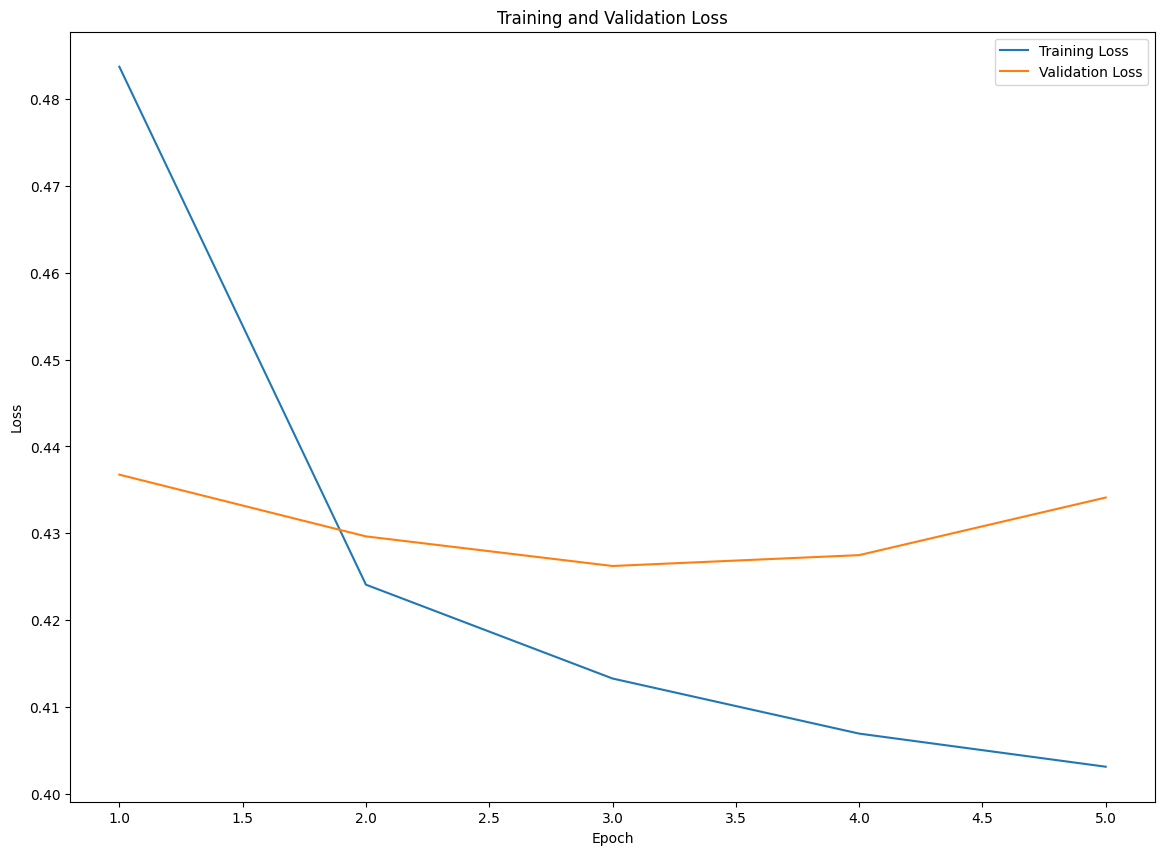

In [41]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### **TensorFlow Model Evaluation**

In [42]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4306 - auc: 0.8364


[0.43062108755111694, 0.8363558650016785]

From the above model building and evaluation, the TensorFlow model performed better than the XGBoost model. However, these two models metrics can be improved upon by further Hyperparameter tuning and feature engineering.